In [1]:
import sys
import os
sys.path.append('../dags')

from database import create_database_engine


# 환경 변수 설정
os.environ["POSTGRES_USER"] = "airflow"
os.environ["POSTGRES_PASSWORD"] = "airflow"
os.environ["POSTGRES_DB"] = "events"
os.environ["POSTGRES_PORT"] = "5433"

engine = create_database_engine(host="127.0.0.1")
print("Successfully connected to the database")

Successfully connected to the database


In [2]:
import pandas as pd
from datetime import datetime


query = f"""
SELECT ar.event_id,
    ar.event_ts,
    ar.market,
    de.company_name,
    de.report_name,
    l.summary_kr,
    l.masked,
    ar.abn_ret_minus_10m,
    ar.abn_ret_minus_20m,
    ar.abn_ret_minus_30m,
    ar.abn_ret_minus_40m,
    ar.abn_ret_minus_50m,
    ar.abn_ret_minus_60m,
    ar.abn_ret_10m,
    ar.abn_ret_20m,
    ar.abn_ret_30m,
    ar.abn_ret_40m,
    ar.abn_ret_50m,
    ar.abn_ret_60m,
    l.label
FROM abnormal_return ar
JOIN label l ON ar.event_id = l.id
JOIN disclosure_events de ON ar.event_id = de.id
WHERE l.label is not NULL
ORDER BY l.id ASC"""

target_df = pd.read_sql(query, engine)
target_df

DETAIL:  The database was created using collation version 2.36, but the operating system provides version 2.41.
HINT:  Rebuild all objects in this database that use the default collation and run ALTER DATABASE events REFRESH COLLATION VERSION, or build PostgreSQL with the right library version.


,event_id,event_ts,market,company_name,report_name,summary_kr,masked,abn_ret_minus_10m,abn_ret_minus_20m,abn_ret_minus_30m,abn_ret_minus_40m,abn_ret_minus_50m,abn_ret_minus_60m,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,label
0,32519,2022-07-01 01:03:17+00:00,KOSDAQ,강원에너지,타법인주식및출자증권취득결정(자율공시),"강원에너지(시가총액 1,842억 원)는 2022년 7월 1일 강원이솔루션의 주식을 ...","회사 A(시가총액 1,842억 원)는 2022년 7월 1일 회사 B의 주식을 20억...",-1.80,-1.61,-2.03,-2.74,-2.32,-1.18,-1.27,-2.41,-2.36,-1.79,-2.98,-1.98,0
1,32520,2022-07-01 01:24:45+00:00,KOSDAQ,비츠로셀,단일판매ㆍ공급계약체결,비츠로셀이 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,회사 A가 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,-1.57,-1.62,-1.91,-1.33,-2.52,-1.48,0.53,2.43,1.19,1.57,1.38,1.72,0
2,32521,2022-07-01 01:27:02+00:00,KOSDAQ,비츠로테크,단일판매ㆍ공급계약체결(자회사의 주요경영사항),비츠로테크는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했...,회사 A는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했으...,-0.05,0.39,0.10,-1.01,-0.14,-0.14,0.29,0.24,1.25,1.39,2.02,1.63,0
3,32522,2022-07-01 01:43:15+00:00,KOSPI,동원시스템즈,신규시설투자등(자율공시),동원시스템즈는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신...,회사 A는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신규시...,-0.89,-0.92,-0.82,-0.81,-0.59,0.16,0.08,0.36,0.31,0.12,-0.18,0.23,0
4,32524,2022-07-01 02:30:09+00:00,KOSDAQ,올릭스,투자판단관련주요경영사항(노인성 황반변성 환자에서 OLX10212의 안전성 및 내약성...,올릭스는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서 ...,회사 A는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서...,-1.91,-0.73,0.47,0.44,0.08,1.81,-0.40,-1.02,-1.80,-1.24,-1.82,-1.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,68128,2023-12-28 05:53:08+00:00,KOSPI,까뮤이앤씨,단일판매ㆍ공급계약체결,까뮤이앤씨는 조달청과 전라남도 목포시에서 수산식품 수출단지 조성사업 건축공사(공급지...,회사 A는 조달청과 전라남도 목포시에서 수산식품 수출단지 조성사업 건축공사(공급지역...,-0.08,0.80,0.02,0.26,0.25,0.86,0.24,0.24,NaN,NaN,NaN,NaN,0
8077,68129,2023-12-28 05:55:03+00:00,KOSPI,에코프로머티,조회공시요구(현저한시황변동)에대한답변(미확정),"에코프로머티리얼즈는 신규 고객 확보와 관련된 사업 협의를 진행 중이며, 아직 확정된...","회사 A는 신규 고객 확보와 관련된 사업 협의를 진행 중이며, 아직 확정된 내용은 ...",-0.31,0.84,0.80,1.16,0.76,0.93,-2.10,-3.25,NaN,NaN,NaN,NaN,1
8078,68130,2023-12-28 05:56:27+00:00,KOSDAQ,에코마케팅,[기재정정]연결재무제표기준영업실적등에대한전망(공정공시),"에코마케팅은 2023년 매출액 3,500억 원과 영업이익 530억 원을 기록할 것으...","회사 A은 2023년 매출액 3,500억 원과 영업이익 530억 원을 기록할 것으로...",0.05,0.08,-0.02,-0.16,-0.06,0.12,-0.28,-0.54,NaN,NaN,NaN,NaN,0
8079,68131,2023-12-28 05:56:32+00:00,KOSDAQ,에코마케팅,[기재정정]영업실적등에대한전망(공정공시),"에코마케팅은 2023년 매출액이 490억 원, 영업이익이 200억 원으로 예상되며,...","회사 A는 2023년 매출액이 490억 원, 영업이익이 200억 원으로 예상되며, ...",0.05,0.08,-0.02,-0.16,-0.06,0.12,-0.28,-0.54,NaN,NaN,NaN,NaN,0


In [3]:
print("\n=== 기본 데이터 분석 ===")
print(target_df.describe().to_string())
print()
print(target_df.info())
print()

target_df.head()


=== 기본 데이터 분석 ===
           event_id  abn_ret_minus_10m  abn_ret_minus_20m  abn_ret_minus_30m  abn_ret_minus_40m  abn_ret_minus_50m  abn_ret_minus_60m  abn_ret_10m  abn_ret_20m  abn_ret_30m  abn_ret_40m  abn_ret_50m  abn_ret_60m        label
count   8081.000000        7949.000000        7800.000000        7663.000000        7499.000000        7360.000000        7208.000000  7691.000000  7267.000000  6847.000000  6468.000000  6089.000000  5751.000000  8081.000000
mean   52291.499319          -0.483359          -0.485553          -0.481395          -0.489561          -0.486923          -0.484395    -0.102281    -0.130420    -0.129969    -0.067936    -0.095108    -0.087294     0.709194
std    10497.762955           1.458347           1.533760           1.636924           1.687225           1.739774           1.796053     1.574681     1.794265     1.931096     2.326333     2.465915     2.565917     0.835965
min    32519.000000         -13.120000         -13.950000         -16.870000     

,event_id,event_ts,market,company_name,report_name,summary_kr,masked,abn_ret_minus_10m,abn_ret_minus_20m,abn_ret_minus_30m,abn_ret_minus_40m,abn_ret_minus_50m,abn_ret_minus_60m,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,label
0,32519,2022-07-01 01:03:17+00:00,KOSDAQ,강원에너지,타법인주식및출자증권취득결정(자율공시),"강원에너지(시가총액 1,842억 원)는 2022년 7월 1일 강원이솔루션의 주식을 ...","회사 A(시가총액 1,842억 원)는 2022년 7월 1일 회사 B의 주식을 20억...",-1.80,-1.61,-2.03,-2.74,-2.32,-1.18,-1.27,-2.41,-2.36,-1.79,-2.98,-1.98,0
1,32520,2022-07-01 01:24:45+00:00,KOSDAQ,비츠로셀,단일판매ㆍ공급계약체결,비츠로셀이 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,회사 A가 2022년 6월 30일부터 2023년 10월 20일까지 방위사업청과 리튬...,-1.57,-1.62,-1.91,-1.33,-2.52,-1.48,0.53,2.43,1.19,1.57,1.38,1.72,0
2,32521,2022-07-01 01:27:02+00:00,KOSDAQ,비츠로테크,단일판매ㆍ공급계약체결(자회사의 주요경영사항),비츠로테크는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했...,회사 A는 방위사업청과 리튬전지류 및 기뢰정비장비용 전지조립체 공급 계약을 체결했으...,-0.05,0.39,0.10,-1.01,-0.14,-0.14,0.29,0.24,1.25,1.39,2.02,1.63,0
3,32522,2022-07-01 01:43:15+00:00,KOSPI,동원시스템즈,신규시설투자등(자율공시),동원시스템즈는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신...,회사 A는 2022년 7월 1일부터 2023년 7월 31일까지 585억 원을 신규시...,-0.89,-0.92,-0.82,-0.81,-0.59,0.16,0.08,0.36,0.31,0.12,-0.18,0.23,0
4,32524,2022-07-01 02:30:09+00:00,KOSDAQ,올릭스,투자판단관련주요경영사항(노인성 황반변성 환자에서 OLX10212의 안전성 및 내약성...,올릭스는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서 ...,회사 A는 노인성 황반변성 치료를 위한 OLX10212의 제1상 임상시험을 미국에서...,-1.91,-0.73,0.47,0.44,0.08,1.81,-0.40,-1.02,-1.80,-1.24,-1.82,-1.60,2


In [4]:
ret_columns = [
    "abn_ret_minus_10m", "abn_ret_minus_20m", "abn_ret_minus_30m", 
    "abn_ret_minus_40m", "abn_ret_minus_50m", "abn_ret_minus_60m",
    "abn_ret_10m", "abn_ret_20m", "abn_ret_30m", 
    "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"
]

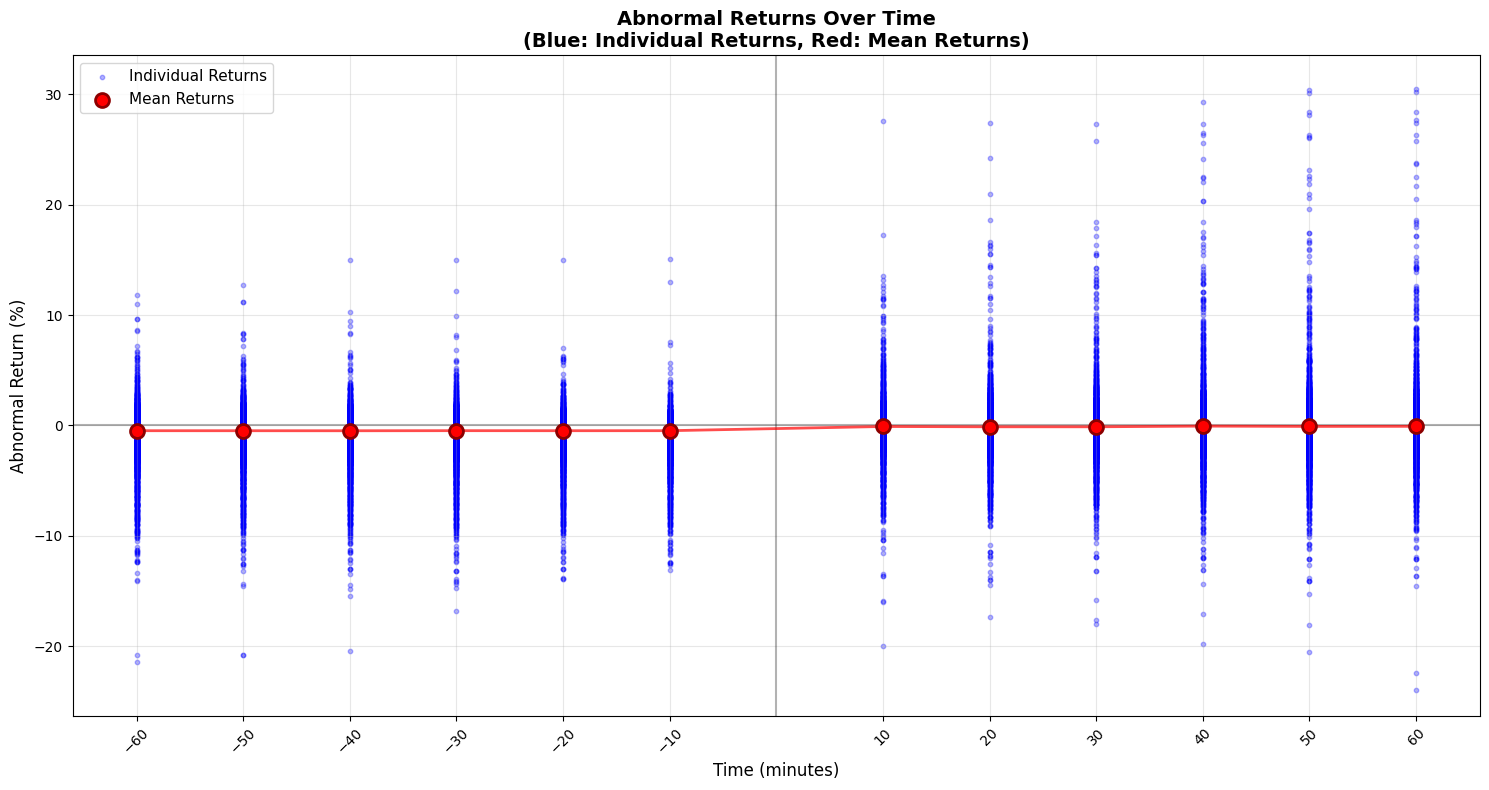

=== 시간별 수익률 통계 ===
전체 데이터 포인트 수: 85,592
시간 범위: -60분 ~ 60분
수익률 범위: -23.960% ~ 30.490%
전체 평균 수익률: -0.306%
전체 표준편차: 1.883%

=== 시간별 평균 수익률 ===
-60분: -0.484%
-50분: -0.487%
-40분: -0.490%
-30분: -0.481%
-20분: -0.486%
-10분: -0.483%
 10분: -0.102%
 20분: -0.130%
 30분: -0.130%
 40분: -0.068%
 50분: -0.095%
 60분: -0.087%

=== 이벤트 전후 비교 ===
이벤트 전 평균 수익률: -0.485%
이벤트 후 평균 수익률: -0.102%
이벤트 후 - 이벤트 전: 0.383%


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 시간축 설정 (분 단위)
time_points = [-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]
df_with_returns = target_df.copy()

# 수익률 컬럼들 (시간순서대로 정렬)
ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    0,  # 0분 시점은 없으므로 0으로 설정
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

# 실제 수익률 데이터가 있는 컬럼들만 추출
valid_ret_columns = [col for col in ret_columns if col != 0]
valid_time_points = [t for t in time_points if t != 0]

# 각 시간점별 데이터 수집
all_returns = []
all_times = []

for i, col in enumerate(valid_ret_columns):
    if col in df_with_returns.columns:
        # NaN이 아닌 데이터만 추출
        valid_data = df_with_returns[col].dropna()
        if len(valid_data) > 0:
            # 해당 시간점에 대한 모든 수익률 데이터 추가
            for ret in valid_data:
                all_returns.append(ret)
                all_times.append(valid_time_points[i])

# 개별 점들을 파란색으로 표시
plt.figure(figsize=(15, 8))
plt.scatter(all_times, all_returns, alpha=0.3, color='blue', s=10, label='Individual Returns')

# 각 시간점별 평균 계산 및 빨간색 점으로 표시
mean_returns = []
mean_times = []

for i, col in enumerate(valid_ret_columns):
    if col in df_with_returns.columns:
        valid_data = df_with_returns[col].dropna()
        if len(valid_data) > 0:
            mean_ret = valid_data.mean()
            mean_returns.append(mean_ret)
            mean_times.append(valid_time_points[i])

# 평균값들을 빨간색 점으로 표시
plt.scatter(mean_times, mean_returns, color='red', s=100, marker='o', 
           label='Mean Returns', zorder=5, edgecolor='darkred', linewidth=2)

# 평균값들을 빨간색 선으로 연결
plt.plot(mean_times, mean_returns, color='red', linewidth=2, alpha=0.7, zorder=4)

# 그래프 설정
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # 0% 수평선
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)  # 0분 수직선

plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Abnormal Return (%)', fontsize=12)
plt.title('Abnormal Returns Over Time\n(Blue: Individual Returns, Red: Mean Returns)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# x축 라벨 설정
plt.xticks(valid_time_points, rotation=45)

# y축 범위 설정 (데이터에 따라 조정)
plt.ylim(min(all_returns) * 1.1, max(all_returns) * 1.1)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("=== 시간별 수익률 통계 ===")
print(f"전체 데이터 포인트 수: {len(all_returns):,}")
print(f"시간 범위: {min(valid_time_points)}분 ~ {max(valid_time_points)}분")
print(f"수익률 범위: {min(all_returns):.3f}% ~ {max(all_returns):.3f}%")
print(f"전체 평균 수익률: {np.mean(all_returns):.3f}%")
print(f"전체 표준편차: {np.std(all_returns):.3f}%")

print("\n=== 시간별 평균 수익률 ===")
for time, mean_ret in zip(mean_times, mean_returns):
    print(f"{time:3d}분: {mean_ret:6.3f}%")

# 이벤트 전후 비교
before_event = [mean_ret for time, mean_ret in zip(mean_times, mean_returns) if time < 0]
after_event = [mean_ret for time, mean_ret in zip(mean_times, mean_returns) if time > 0]

if before_event and after_event:
    print(f"\n=== 이벤트 전후 비교 ===")
    print(f"이벤트 전 평균 수익률: {np.mean(before_event):.3f}%")
    print(f"이벤트 후 평균 수익률: {np.mean(after_event):.3f}%")
    print(f"이벤트 후 - 이벤트 전: {np.mean(after_event) - np.mean(before_event):.3f}%")


In [6]:
import pandas as pd
import numpy as np

ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

# 실제 존재하는 컬럼만 필터링
valid_ret_columns = [col for col in ret_columns if col in df_with_returns.columns]

# 통계 계산을 위한 리스트 초기화
stats_data = []

for col in valid_ret_columns:
    abn_ret_data = df_with_returns[col].dropna()
    
    if len(abn_ret_data) > 0:
        total_count = len(abn_ret_data)
        total_mean = abn_ret_data.mean()
        total_std = abn_ret_data.std()
        positive_count = (abn_ret_data > 0).sum()
        total_positive_ratio = (positive_count / total_count * 100) if total_count > 0 else 0
        
        stats_data.append({
            'Column': col,
            'Count': total_count,
            'Mean (%)': round(total_mean, 3),
            'Std (%)': round(total_std, 3),
            'Positive_Count': positive_count,
            'Positive_Ratio (%)': round(total_positive_ratio, 1)
        })

# DataFrame으로 변환
stats_df = pd.DataFrame(stats_data)

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_60m': -60, 'abn_ret_minus_50m': -50, 'abn_ret_minus_40m': -40,
    'abn_ret_minus_30m': -30, 'abn_ret_minus_20m': -20, 'abn_ret_minus_10m': -10,
    'abn_ret_10m': 10, 'abn_ret_20m': 20, 'abn_ret_30m': 30,
    'abn_ret_40m': 40, 'abn_ret_50m': 50, 'abn_ret_60m': 60
}

stats_df['Time_Order'] = stats_df['Column'].map(time_order)
stats_df = stats_df.sort_values('Time_Order').drop('Time_Order', axis=1)


# 요약 통계
print(f"\n=== 요약 통계 ===")
print(f"총 컬럼 수: {len(stats_df)}")
print(f"총 데이터 포인트: {stats_df['Count'].sum():,}")
print(f"평균 수익률 범위: {stats_df['Mean (%)'].min():.3f}% ~ {stats_df['Mean (%)'].max():.3f}%")
print(f"표준편차 범위: {stats_df['Std (%)'].min():.3f}% ~ {stats_df['Std (%)'].max():.3f}%")

# 이벤트 전후 비교
before_event = stats_df[stats_df['Column'].str.contains('minus')]
after_event = stats_df[~stats_df['Column'].str.contains('minus')]

if len(before_event) > 0 and len(after_event) > 0:
    print(f"\n=== 이벤트 전후 비교 ===")
    print(f"이벤트 전 평균 수익률: {before_event['Mean (%)'].mean():.3f}%")
    print(f"이벤트 후 평균 수익률: {after_event['Mean (%)'].mean():.3f}%")
    print(f"이벤트 후 - 이벤트 전: {after_event['Mean (%)'].mean() - before_event['Mean (%)'].mean():.3f}%")


print("")
print("=== 전체 Abnormal Return 통계 ===")
print(stats_df.to_string(index=False))


=== 요약 통계 ===
총 컬럼 수: 12
총 데이터 포인트: 85,592
평균 수익률 범위: -0.490% ~ -0.068%
표준편차 범위: 1.458% ~ 2.566%

=== 이벤트 전후 비교 ===
이벤트 전 평균 수익률: -0.485%
이벤트 후 평균 수익률: -0.102%
이벤트 후 - 이벤트 전: 0.383%

=== 전체 Abnormal Return 통계 ===
           Column  Count  Mean (%)  Std (%)  Positive_Count  Positive_Ratio (%)
abn_ret_minus_60m   7208    -0.484    1.796            2940                40.8
abn_ret_minus_50m   7360    -0.487    1.740            2972                40.4
abn_ret_minus_40m   7499    -0.490    1.687            3034                40.5
abn_ret_minus_30m   7663    -0.481    1.637            3034                39.6
abn_ret_minus_20m   7800    -0.486    1.534            3012                38.6
abn_ret_minus_10m   7949    -0.483    1.458            3007                37.8
      abn_ret_10m   7691    -0.102    1.575            3594                46.7
      abn_ret_20m   7267    -0.130    1.794            3331                45.8
      abn_ret_30m   6847    -0.130    1.931            3157       

In [7]:
# label값 다시 매핑: 0 -> 1, 1 -> 0, 2 -> -1
label_map = {0: 1, 1: 0, 2: -1}
df_with_returns['label'] = df_with_returns['label'].map(label_map)
df_with_returns['label'].value_counts().sort_index(ascending=False)

label
 1    4340
 0    1751
-1    1990
Name: count, dtype: int64

# AI Inference

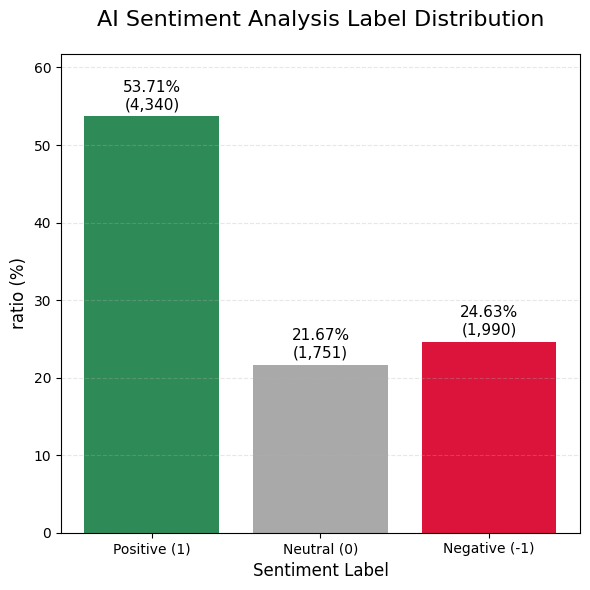

=== AI Sentiment Analysis Label Distribution ===
positive: 4,340건 (53.71%)
neutral: 1,751건 (21.67%)
negative: 1,990건 (24.63%)


In [8]:
# label 비율 시각화
plt.figure(figsize=(6, 6))

# label 비율 계산
label_counts = df_with_returns['label'].value_counts()
label_ratios = (label_counts / len(df_with_returns) * 100).round(2)

# 색상 매핑 (라벨 순서에 맞게)
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)

# x축 라벨 설정: 1=Positive(초록), 0=Neutral(회색), -1=Negative(빨강)
label_order = [1, 0, -1]
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

# 막대 그래프 생성
bars = plt.bar(range(len(label_order)), [label_ratios.get(l, 0) for l in label_order], color=colors)

# 막대 위에 비율 표시
for i, label in enumerate(label_order):
    if label in label_counts:
        ratio = label_ratios[label]
        count = label_counts[label]
        plt.text(i, ratio + 0.5, f'{ratio}%\n({count:,})',
                 ha='center', va='bottom', fontsize=11)

plt.title('AI Sentiment Analysis Label Distribution', fontsize=16, pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('ratio (%)', fontsize=12)
plt.ylim(0, max(label_ratios.values) * 1.15)

plt.xticks(range(len(label_order)), label_names)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("=== AI Sentiment Analysis Label Distribution ===")
for i, label in enumerate(label_order):
    if label in label_counts:
        count = label_counts[label]
        ratio = label_ratios[label]
        print(f"{label_names[i].split()[0].lower()}: {count:,}건 ({ratio}%)")


In [9]:
print("Mean")
print(df_with_returns.groupby('label')[ret_columns].mean().to_string())

print()
print("Stdandard deviation")
print(df_with_returns.groupby('label')[ret_columns].std().to_string())

Mean
       abn_ret_minus_60m  abn_ret_minus_50m  abn_ret_minus_40m  abn_ret_minus_30m  abn_ret_minus_20m  abn_ret_minus_10m  abn_ret_10m  abn_ret_20m  abn_ret_30m  abn_ret_40m  abn_ret_50m  abn_ret_60m
label                                                                                                                                                                                                
-1             -0.168086          -0.169038          -0.189511          -0.167328          -0.161750          -0.160906    -0.210145    -0.248071    -0.271219    -0.162289    -0.163293    -0.114320
 0             -0.107667          -0.111717          -0.112766          -0.118175          -0.119326          -0.137724    -0.020390    -0.004444     0.003897     0.049073     0.014888     0.022504
 1             -0.784550          -0.786748          -0.780902          -0.773357          -0.784488          -0.770937    -0.087149    -0.130475    -0.124867    -0.076329    -0.112479    -0.123184

Stda

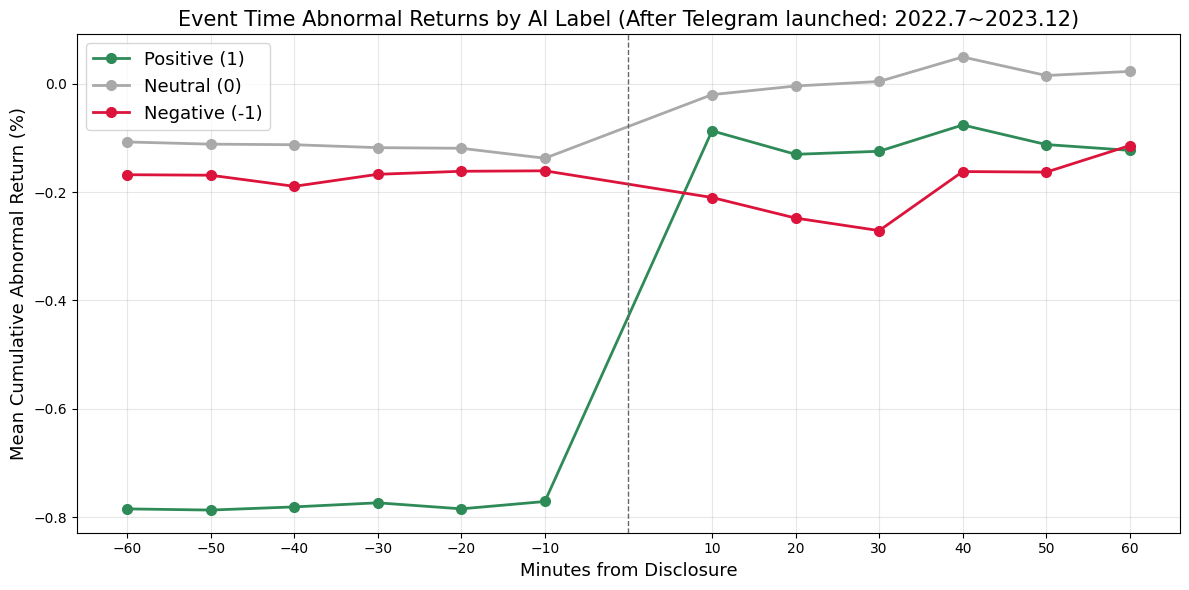

In [10]:
# X축 -60, -50, ..., 60, Y축 abnormal_ret_*m 평균값, 라벨별 색상/범례 + 데이터 포인트에 점 표시

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_60m': -60, 'abn_ret_minus_50m': -50, 'abn_ret_minus_40m': -40,
    'abn_ret_minus_30m': -30, 'abn_ret_minus_20m': -20, 'abn_ret_minus_10m': -10,
    'abn_ret_10m': 10, 'abn_ret_20m': 20, 'abn_ret_30m': 30,
    'abn_ret_40m': 40, 'abn_ret_50m': 50, 'abn_ret_60m': 60
}

ordered_ret_cols = [col for col, _ in sorted(time_order.items(), key=lambda x: x[1]) if col in df_with_returns.columns]
plot_time_points = [time_order[col] for col in ordered_ret_cols]

fig, ax = plt.subplots(figsize=(12,6))

for label, color, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    mean_vals = grp[ordered_ret_cols].mean()
    # 꺾은선 + 데이터 포인트에 점 표시
    ax.plot(plot_time_points, mean_vals.values, label=name, color=color, linewidth=2, marker='o', markersize=7)

ax.axvline(0, color="#666", linestyle="--", lw=1)
ax.legend(fontsize=13)
ax.set_xticks(plot_time_points)
ax.set_xlabel("Minutes from Disclosure", fontsize=13)
ax.set_ylabel("Mean Cumulative Abnormal Return (%)", fontsize=13)
ax.set_title("Event Time Abnormal Returns by AI Label (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


# 공시 종류별 감성 분포